Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Visualizing sample images...


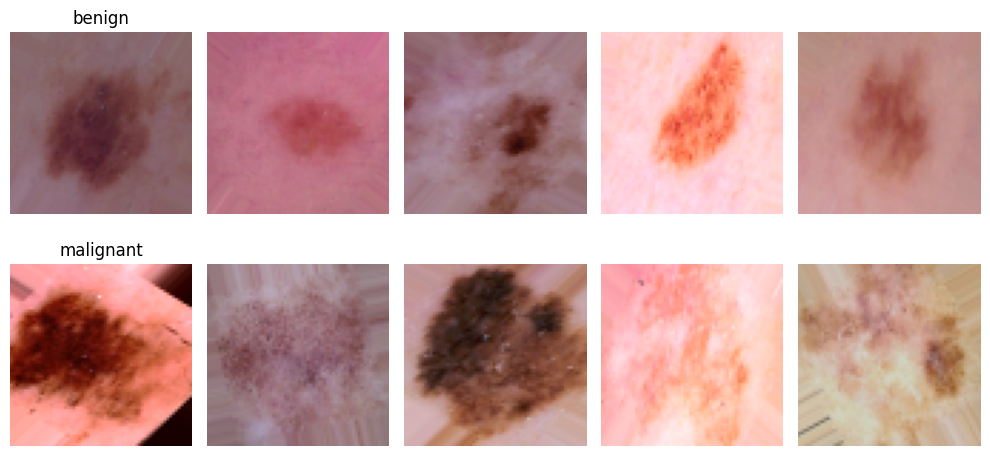


Running Logistic Regression...

Logistic Regression Results:
Accuracy: 0.722

Classification Report:
              precision    recall  f1-score   support

      benign       0.74      0.77      0.75       277
   malignant       0.70      0.66      0.68       223

    accuracy                           0.72       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.72      0.72      0.72       500



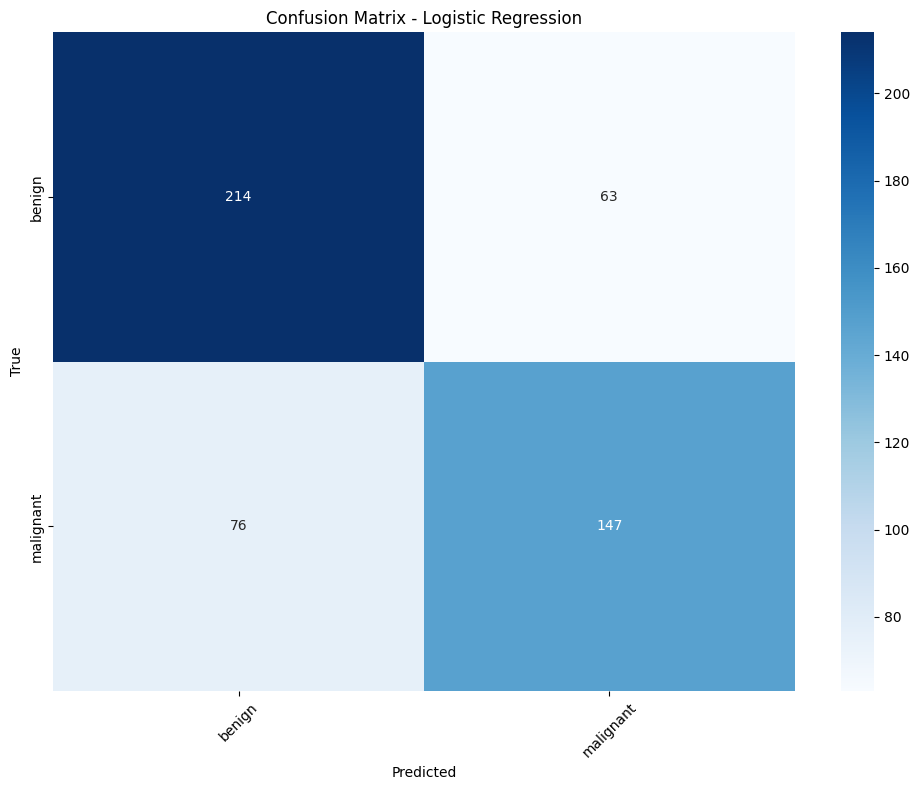


Running K-Nearest Neighbors (KNN)...

KNN Results:
Accuracy: 0.704

Classification Report:
              precision    recall  f1-score   support

      benign       0.69      0.84      0.76       277
   malignant       0.73      0.53      0.62       223

    accuracy                           0.70       500
   macro avg       0.71      0.69      0.69       500
weighted avg       0.71      0.70      0.70       500



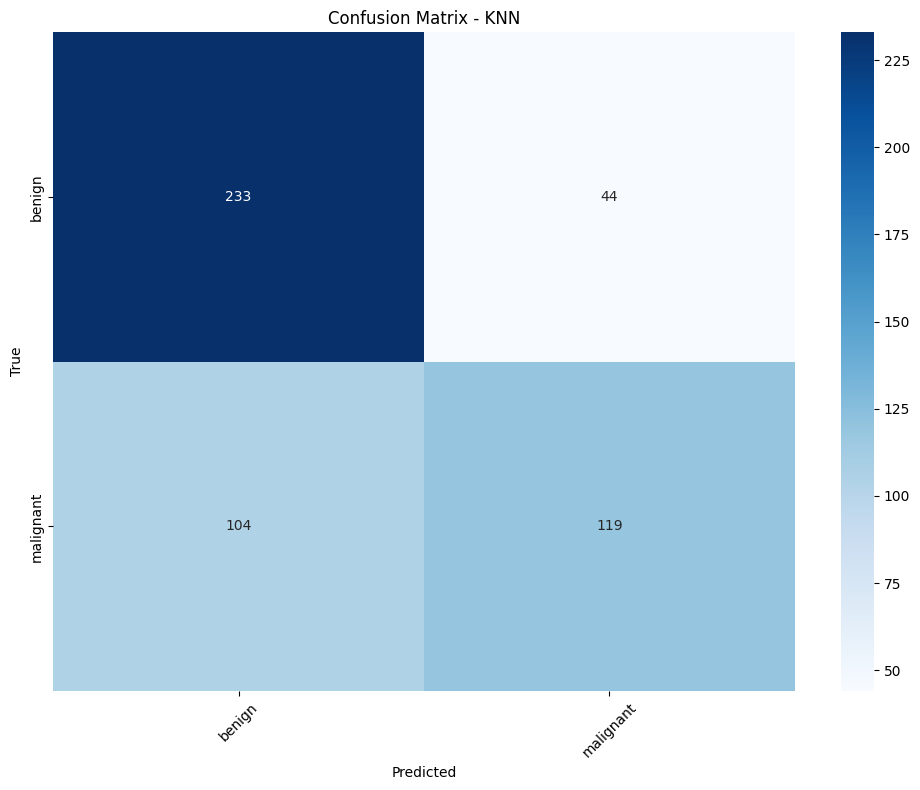

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns


class CancerClassifier:
    def __init__(self):  # Corrected constructor name
        # Class labels for the dataset
        self.class_names = ['benign', 'malignant']
        self.load_data()


    def load_data(self, train_size=None, test_size=None):
        """Load and preprocess the skin cancer dataset with controlled dataset size."""
        train_dir = 'archive/train'
        test_dir = 'archive/test'

        # Data augmentation for training
        train_datagen = ImageDataGenerator(
            rescale=1/255.0,          # Normalize pixel values
            shear_range=0.2,          # Shear transformation
            zoom_range=0.2,           # Zoom transformation
            vertical_flip=True,       # Randomly flip images vertically
            rotation_range=40,        # Randomly rotate images
            brightness_range=(0.5, 1.5),  # Randomly adjust brightness
            horizontal_flip=True      # Randomly flip images horizontally
        )

        # Preprocessing for testing
        test_datagen = ImageDataGenerator(rescale=1/255.0)

        # Load training data
        self.train_data = train_datagen.flow_from_directory(
            train_dir,
            target_size=(64, 64),
            class_mode='sparse',
            shuffle=True,
            seed=1
        )

        # Load testing data
        self.test_data = test_datagen.flow_from_directory(
            test_dir,
            target_size=(64, 64),
            class_mode='sparse',
            shuffle=True,
            seed=1
        )

        # Prepare training data
        total_train_samples = self.train_data.samples
        if train_size is None or train_size > total_train_samples:
            train_size = total_train_samples  # Use all samples if train_size is None or exceeds available data
        train_batches = []
        train_labels = []
        while len(train_batches) < train_size:
            batch = next(self.train_data)
            train_batches.append(batch[0])
            train_labels.append(batch[1])
        self.X_train = np.vstack(train_batches)[:train_size].reshape(train_size, -1)
        self.y_train = np.hstack(train_labels)[:train_size]

        # Prepare testing data
        total_test_samples = self.test_data.samples
        if test_size is None or test_size > total_test_samples:
            test_size = total_test_samples  # Use all samples if test_size is None or exceeds available data
        test_batches = []
        test_labels = []
        while len(test_batches) < test_size:
            batch = next(self.test_data)
            test_batches.append(batch[0])
            test_labels.append(batch[1])
        self.X_test = np.vstack(test_batches)[:test_size].reshape(test_size, -1)
        self.y_test = np.hstack(test_labels)[:test_size]



    def visualize_samples(self, num_samples=5):
        """Visualize sample images from each class."""
        plt.figure(figsize=(10, 5))
        for class_idx, class_name in enumerate(self.class_names):
            class_images = [
                self.train_data[i][0][np.where(self.train_data[i][1] == class_idx)[0][0]]
                for i in range(len(self.train_data))
                if np.any(self.train_data[i][1] == class_idx)
            ][:num_samples]

            for sample_idx, img in enumerate(class_images):
                plt.subplot(len(self.class_names), num_samples, class_idx * num_samples + sample_idx + 1)
                plt.imshow(img)
                plt.axis('off')
                if sample_idx == 0:
                    plt.title(class_name)
        plt.tight_layout()
        plt.show()

    def evaluate_model(self, y_true, y_pred, model_name):
        """Evaluate model performance and display metrics."""
        print(f"\n{model_name} Results:")
        print("Accuracy:", accuracy_score(y_true, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=self.class_names))

        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names,
                    yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def run_experiments(self):
        """Run experiments with Logistic Regression and KNN."""

        # Logistic Regression
        print("\nRunning Logistic Regression...")
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(self.X_train, self.y_train)
        log_reg_predictions = log_reg.predict(self.X_test)
        self.evaluate_model(self.y_test, log_reg_predictions, "Logistic Regression")

        # K-Nearest Neighbors (KNN)
        print("\nRunning K-Nearest Neighbors (KNN)...")
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(self.X_train, self.y_train)
        knn_predictions = knn.predict(self.X_test)
        self.evaluate_model(self.y_test, knn_predictions, "KNN")


if __name__ == "__main__":
    # Initialize the classifier with controlled dataset size
    classifier = CancerClassifier()
    classifier.load_data(train_size=1000, test_size=500)  # Adjust sizes as needed

    # Visualize sample images
    print("Visualizing sample images...")
    classifier.visualize_samples()

    # Run classification experiments
    classifier.run_experiments()

